# Data personalization
This notebook demonstrates several approaches to data personalization that:

- Start with an initial dataset
- Modify that dataset to pertain to a new topic

The goal is to match student topic interest while preserving the pedagogy using the dataset.

# Sample dataset new themes

1, News

2, Games

3, Health

4, Sports

5, Travel

6, Science

7, Finance

8, Shopping

9, Real Estate

10, Reference

11, Home & Garden

12, Food & Drink

13, Online Communities

14, Business & Industrial

15, Arts & Entertainment

16, Law & Government

17, People & Society

18, Jobs & Education

19, Computers & Electronics

20, Beauty & Fitness

21, Pets & Animals

22, Books & Literature

23, Autos & Vehicles

24, Internet & Telecom

25, Hobbies & Leisure
```


# Original Themes

| ***[Descriptive stats](./Descriptive-statistics.ipynb)*** | ***\- [iris](./datasets/NoTheme/Stats0.csv)*** |
| :---- | :---- |
| ***[KNN regression](./KNN-regression.ipynb)*** | ***\- [boston](./datasets/NoTheme/KNNReg0.csv)*** |
| ***[Regression trees](./Regression-trees.ipynb)*** | ***\- [baseball](./datasets/NoTheme/RegTrees0.csv)*** |
| ***[Random forests](./Random-forests.ipynb)*** | ***\- [breastcancer](./datasets/NoTheme/Forest0.csv)*** |


# Tranformation Code

The rescale_column function rescales numerical data in a pandas Series to a new range defined by new_min and new_max. The transform function iterates over a data_mapping dictionary, which specifies whether each column in a DataFrame is categorical or numerical. For categorical columns, it maps unique values to new specified values, and for numerical columns, it rescales the values using rescale_column. Finally, it drops the original columns from the DataFrame and returns the transformed DataFrame.

In [1]:
# Function to rescale numerical columns
def rescale_column(series, new_min, new_max):
    old_min, old_max = series.min(), series.max()
    return ((series - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min

# Apply the transformations
def transform(data_mapping,df):
  for original_col, (is_categorical, new_col, new_values) in data_mapping.items():
      print(original_col, new_col)
      if is_categorical:
          # Map categorical values
          unique_values = df[original_col].unique()
          mapping = {old: new for old, new in zip(unique_values, new_values)}
          df[new_col] = df[original_col].map(mapping)
      else:
          # Rescale numerical values
          new_min, new_max = new_values
          df[new_col] = rescale_column(df[original_col], new_min, new_max)

  # Drop the original columns
  df.drop(columns=data_mapping.keys(), inplace=True)
  return df


In [42]:
csvs={
 'Stats': 'https://raw.githubusercontent.com/memphis-iis/datawhys-bootcamp-2024/main/datasets_all/iris.csv',
 'KNNReg':'https://raw.githubusercontent.com/memphis-iis/datawhys-content-notebooks-python/refs/heads/master/datasets/boston.csv',
 'Forest': 'https://raw.githubusercontent.com/lbarbozaum/csv/refs/heads/main/cancer.csv',
 'RegTrees': 'https://raw.githubusercontent.com/memphis-iis/datawhys-intern-solutions-2024/refs/heads/master/datasets/baseball.csv'}
len(csvs)

4

In [35]:
themes=['News','Games','Health','Sports','Travel']
themes

['News', 'Games', 'Health', 'Sports', 'Travel']

In [36]:
pmt=''' Given the dataset with the following columns: {} Imagine this dataset is related to {}. Suggest {} new numerical and categorical variables matching exactly the quantity of columns on the original dataset, ensuring the same number of levels for each categorical variable as in the original dataset. Return a Python dictionary where each original column name is a key, mapped to a tuple with three elements: A flag (is_categorical) indicating if the variable is categorical. The new column name. A vector: For numerical columns, a vector with two values: the minimum and maximum values. For categorical columns, a vector with the new levels. Do not explain just output the dictionary, do not even mention the name of the language'''

In [37]:
import warnings
warnings.filterwarnings("ignore")

It reads multiple CSV files into pandas DataFrames, iterates through each DataFrame to collect the data types of its columns, and formats this information along with a theme and the number of columns into a prompt string. These prompt strings are then appended to a list called prompts.

In [38]:
import pandas as pd
prompts = []
for c in csvs:
  f = csvs[c]
  df = pd.read_csv(f)
  for theme in themes:
    ty=''
    for i in range(0,len(df.dtypes),1):
      ty= df.dtypes.index[i] +' (' + str(df.dtypes[i]) + '), '+ ty
    prompt = pmt.format(ty,theme,len(df.columns))
    prompts.append(prompt)

#for p in prompts:
    #print('###',p)

In [39]:
!pip install openai==0.28

Defaulting to user installation because normal site-packages is not writeable


In [40]:
import openai
openai.api_key = ''


Here we are generating prompts for each combination. It sends these prompts to the OpenAI API to get a response, which is then evaluated into a dictionary. The corresponding CSV file is read into a DataFrame, transformed using the dictionary, and saved as a new CSV file named after the original file and theme.

In [41]:
import os
#os.mkdir('DDDD')
c=0
for csv in csvs:
  t=0
  for theme in themes:
    print('###',csv,'--->',theme,prompts[len(themes)*c+t])
    response = openai.ChatCompletion.create(model="gpt-4",messages=[{"role": "user", "content":prompts[len(themes)*c+t]}],temperature=0)
    dic=eval(response.choices[0].message['content'])
    print(dic)
    cv = csvs[csv]
    df = pd.read_csv(cv)
    dd = transform(dic,df)
    os.makedirs('DDD/'+theme, exist_ok=True)
    dd.to_csv(f'DDD/{theme}/{csv}1.csv')
    t=t+1
  c=c+1



### RegTrees ---> News  Given the dataset with the following columns: NewLeague (object), Salary (float64), Errors (int64), Assists (int64), PutOuts (int64), Division (object), League (object), CWalks (int64), CRBI (int64), CRuns (int64), CHmRun (int64), CHits (int64), CAtBat (int64), Years (int64), Walks (int64), RBI (int64), Runs (int64), HmRun (int64), Hits (int64), AtBat (int64),  Imagine this dataset is related to News. Suggest 20 new numerical and categorical variables matching exactly the quantity of columns on the original dataset, ensuring the same number of levels for each categorical variable as in the original dataset. Return a Python dictionary where each original column name is a key, mapped to a tuple with three elements: A flag (is_categorical) indicating if the variable is categorical. The new column name. A vector: For numerical columns, a vector with two values: the minimum and maximum values. For categorical columns, a vector with the new levels. Do not explain just

In [23]:
print(1)

1


In [ ]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.0/161.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.3 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


AutoViz uses a variety of statistical information to enhance its visualizations, including summary statistics like mean, median, and standard deviation, as well as more complex metrics such as correlation coefficients and distribution shapes. It also identifies outliers and missing values, providing a comprehensive overview of the dataset’s quality and structure. This helps users quickly understand key patterns and relationships within their data.

In [ ]:
ds ='https://raw.githubusercontent.com/memphis-iis/datawhys-intern-solutions-2024/refs/heads/master/datasets/mpg.csv'
#'https://raw.githubusercontent.com/memphis-iis/datawhys-intern-solutions-2023/refs/heads/master/datasets/iris.csv'


In [ ]:
%matplotlib inline
#from autoviz.AutoViz_Class import AutoViz_Class
#AutoViz_Class().AutoViz(filename=ds)

In [ ]:
import pandas as pd
df_iris = pd.read_csv(ds)
df_iris.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model_year,int64
origin,int64
name,object


In [ ]:
prompt = '''
Given the dataset with the following columns:
mpg	float64
cylinders	int64
displacement	float64
horsepower	float64
weight	int64
acceleration	float64
model_year	int64
origin	int64
name	object
Imagine this dataset is related to Vehicle Emissions Data.
Suggest 9 new numerical and categorical variables matching exactly the quantity of columns on the original dataset,
ensuring the same number of levels for each categorical variable as in the original dataset.
Return a Python dictionary where each original column name is a key, mapped to a tuple with three elements:
- A flag (is_categorical) indicating if the variable is categorical.
- The new column name.
- A vector: For numerical columns, a vector with two values: the minimum and maximum values.
For categorical columns, a vector with the new levels.
Do not explain just output the dictionary, do not even mention the name of the language
'''

In [ ]:
dic={
    "mpg": (False, "emissions", [50, 400]),
    "cylinders": (False, "engine_size", [2, 12]),
    "displacement": (False, "fuel_consumption", [1.0, 20.0]),
    "horsepower": (False, "power_output", [50, 1000]),
    "weight": (False, "vehicle_mass", [1500, 5000]),
    "acceleration": (False, "torque", [100, 800]),
    "model_year": (False, "production_year", [1990, 2024]),
    "origin": (True, "region", ["North America", "Europe", "Asia"]),
    "name": (True, "vehicle_type", ["Sedan", "SUV", "Truck", "Coupe", "Convertible", "Hatchback", "Van"])
}



In [ ]:

dn = transform(dic,df_iris)
dn.head()

mpg emissions
cylinders engine_size
displacement fuel_consumption
horsepower power_output
weight vehicle_mass
acceleration torque
model_year production_year
origin region
name vehicle_type


,emissions,engine_size,fuel_consumption,power_output,vehicle_mass,torque,production_year,region,vehicle_type
0,133.776596,12.0,12.733850,483.695652,3376.523958,266.666667,1990.0,North America,Sedan
1,105.851064,12.0,14.844961,664.402174,3564.077119,245.833333,1990.0,North America,SUV
2,133.776596,12.0,13.273902,586.956522,3309.044514,225.000000,1990.0,North America,Truck
3,115.159574,12.0,12.586563,586.956522,3306.067479,266.666667,1990.0,North America,Coupe
4,124.468085,12.0,12.488372,535.326087,3321.944996,204.166667,1990.0,North America,Convertible


In [ ]:
dn.to_csv('VehicleEmissions.csv')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ff='/content/drive/MyDrive/iris_baseball.csv'
#dn.to_csv(ff)

In [ ]:
import pandas as pd
ff='https://raw.githubusercontent.com/lbarbozaum/csv/refs/heads/main/iris-baseball.csv'
df=pd.read_csv(ff)
df.describe()

,Unnamed: 0,home_runs,RBIs,stolen_bases,strikeouts
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,42.870370,65.875000,23.378531,91.555556
std,43.445368,23.001837,27.099644,14.952715,63.596728
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,22.222222,50.000000,5.084746,16.666667
50%,74.500000,41.666667,62.500000,28.389831,100.000000
75%,111.750000,58.333333,81.250000,34.745763,141.666667
max,149.000000,100.000000,150.000000,50.000000,200.000000


Shape of your Data Set loaded: (150, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    6 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
To fix these data quality issues in the dataset, import 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,0.000000,149.000000,Possible ID column: drop before modeling step.
home_runs,float64,0.000000,NA,0.000000,100.000000,No issue
RBIs,float64,0.000000,NA,0.000000,150.000000,Column has 4 outliers greater than upper bound (128.12) or lower than lower bound(3.12). Cap them or remove them.
stolen_bases,float64,0.000000,NA,0.000000,50.000000,Column has a high correlation with ['home_runs']. Consider dropping one of them.
strikeouts,float64,0.000000,NA,0.000000,200.000000,"Column has a high correlation with ['home_runs', 'stolen_bases']. Consider dropping one of them."
position,object,0.000000,2,,,No issue


Number of All Scatter Plots = 10


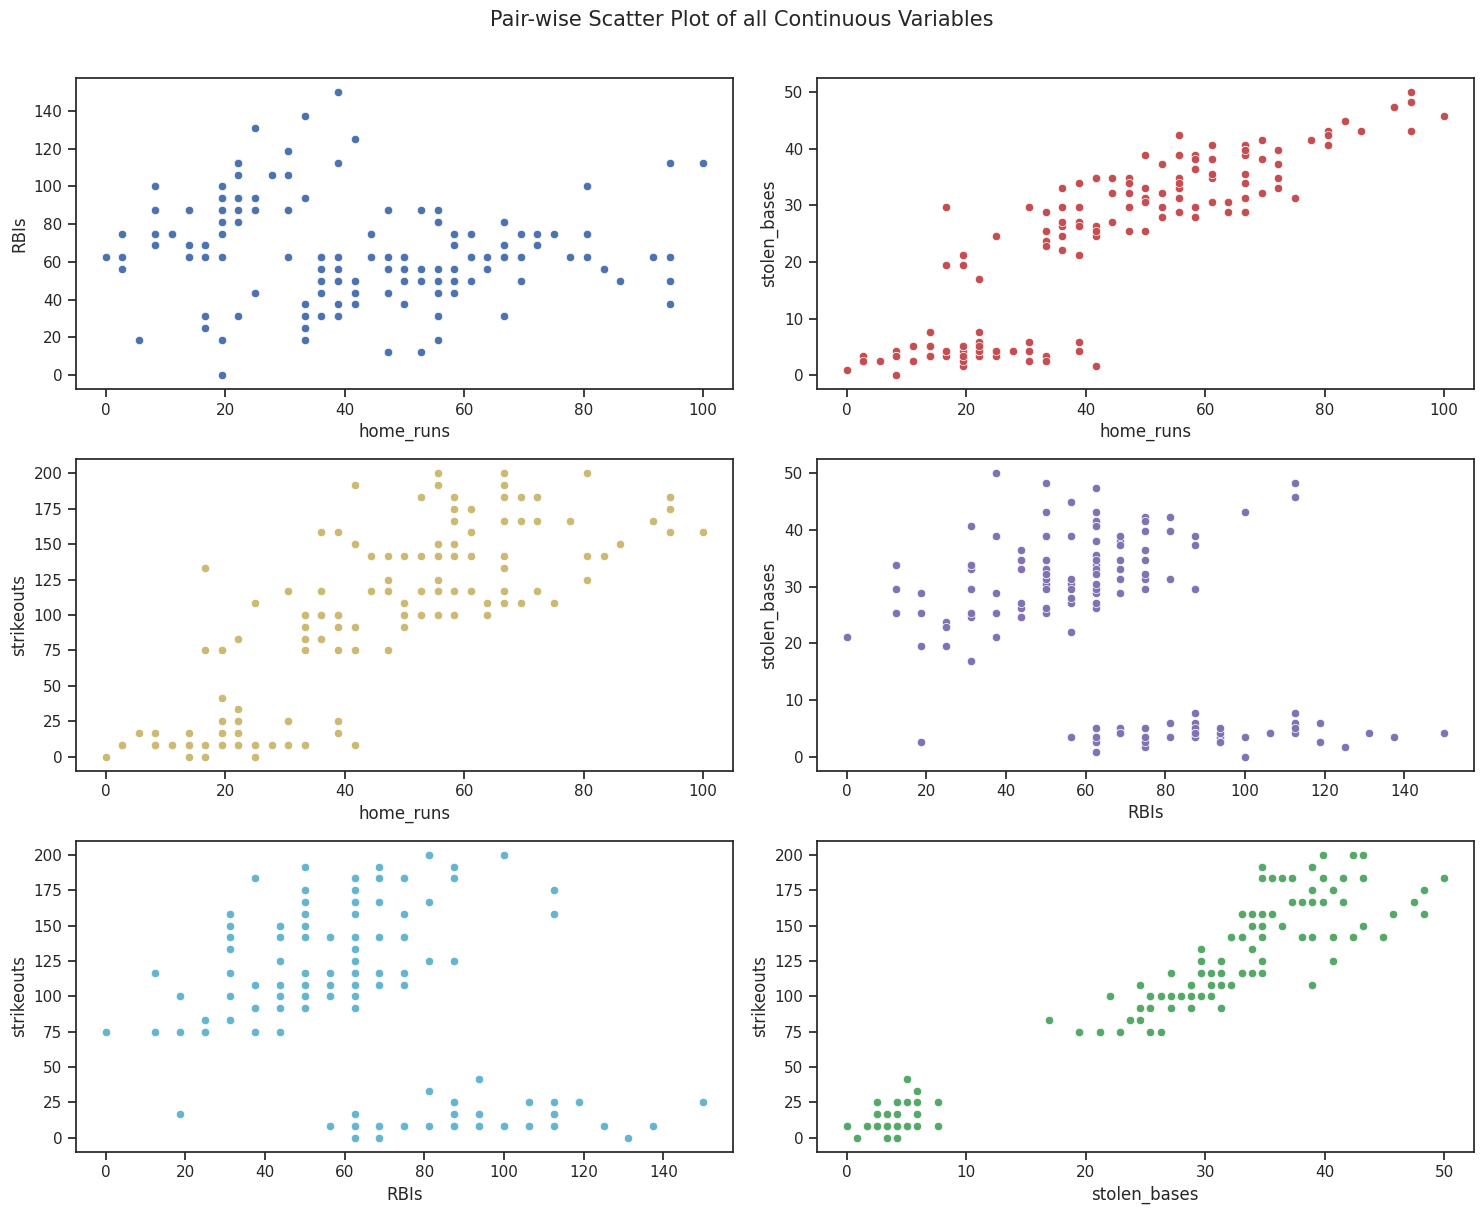

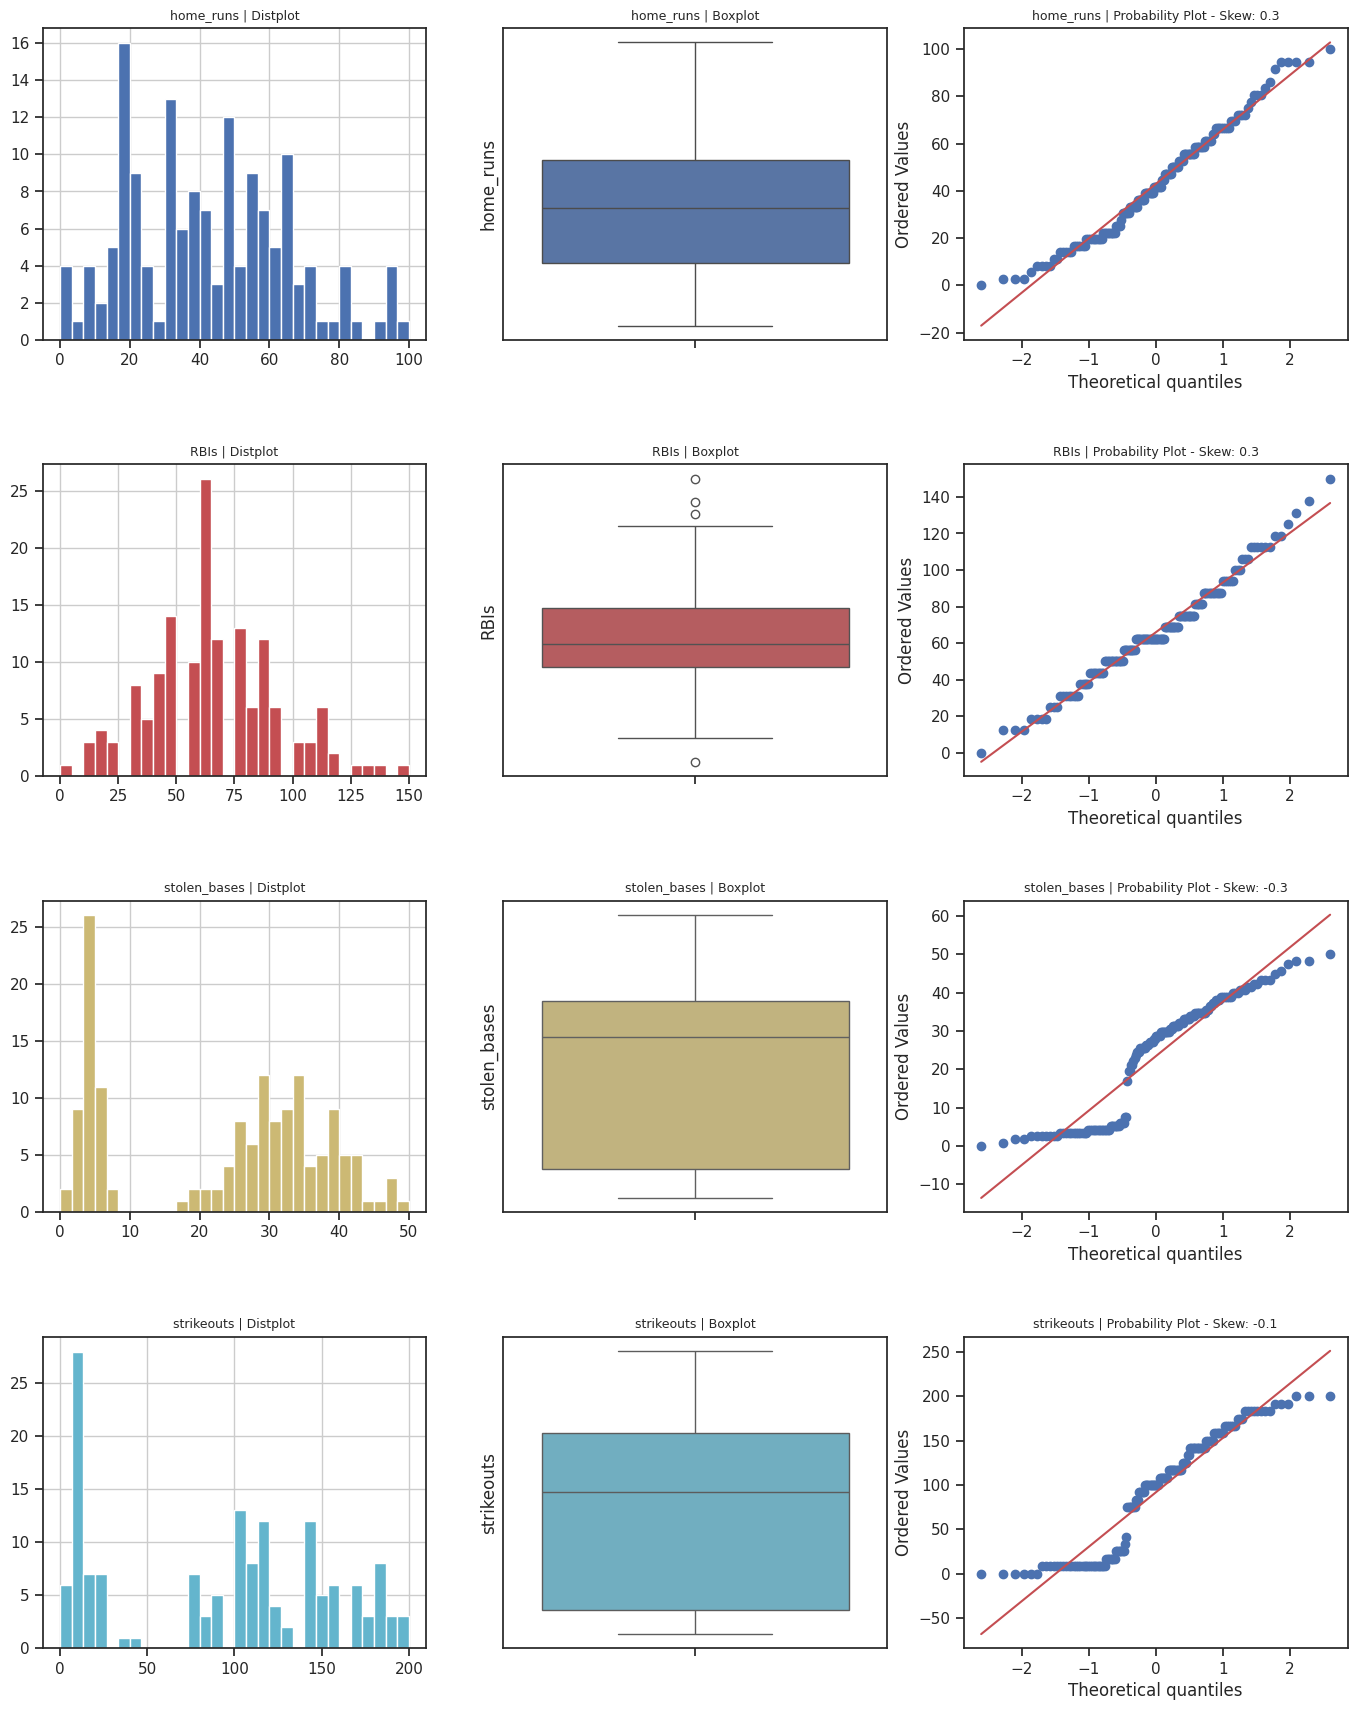

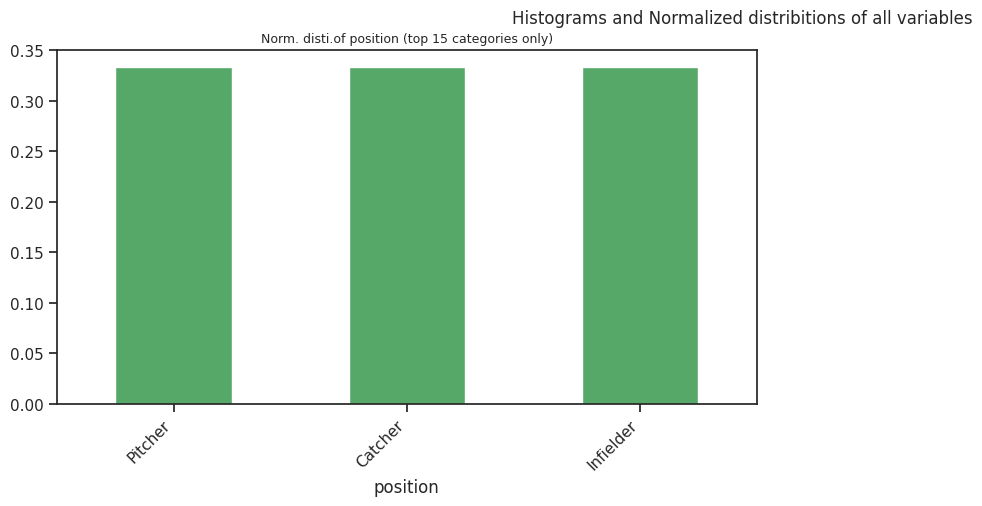

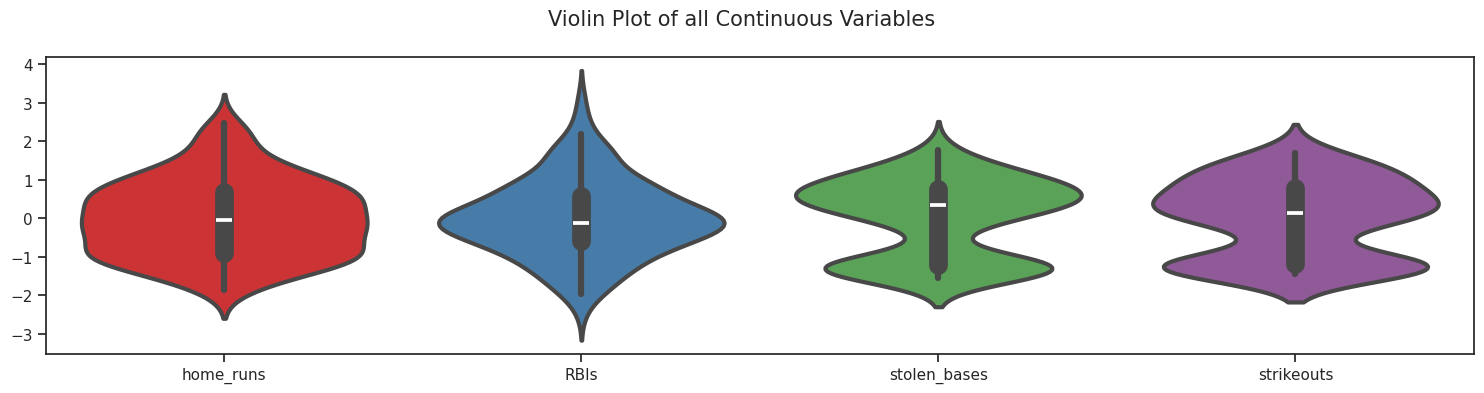

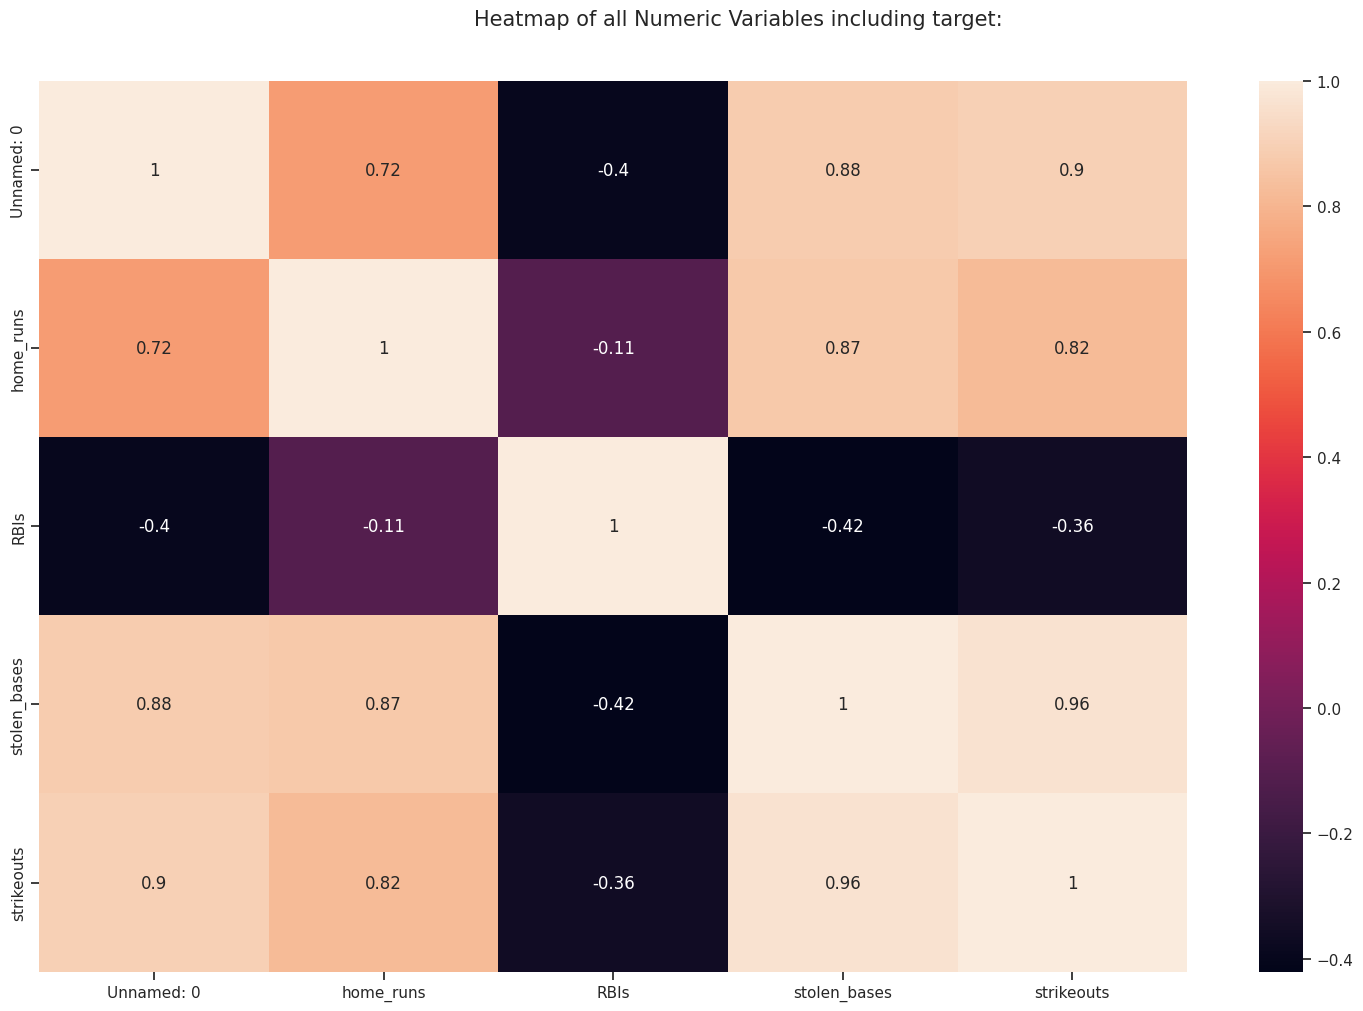

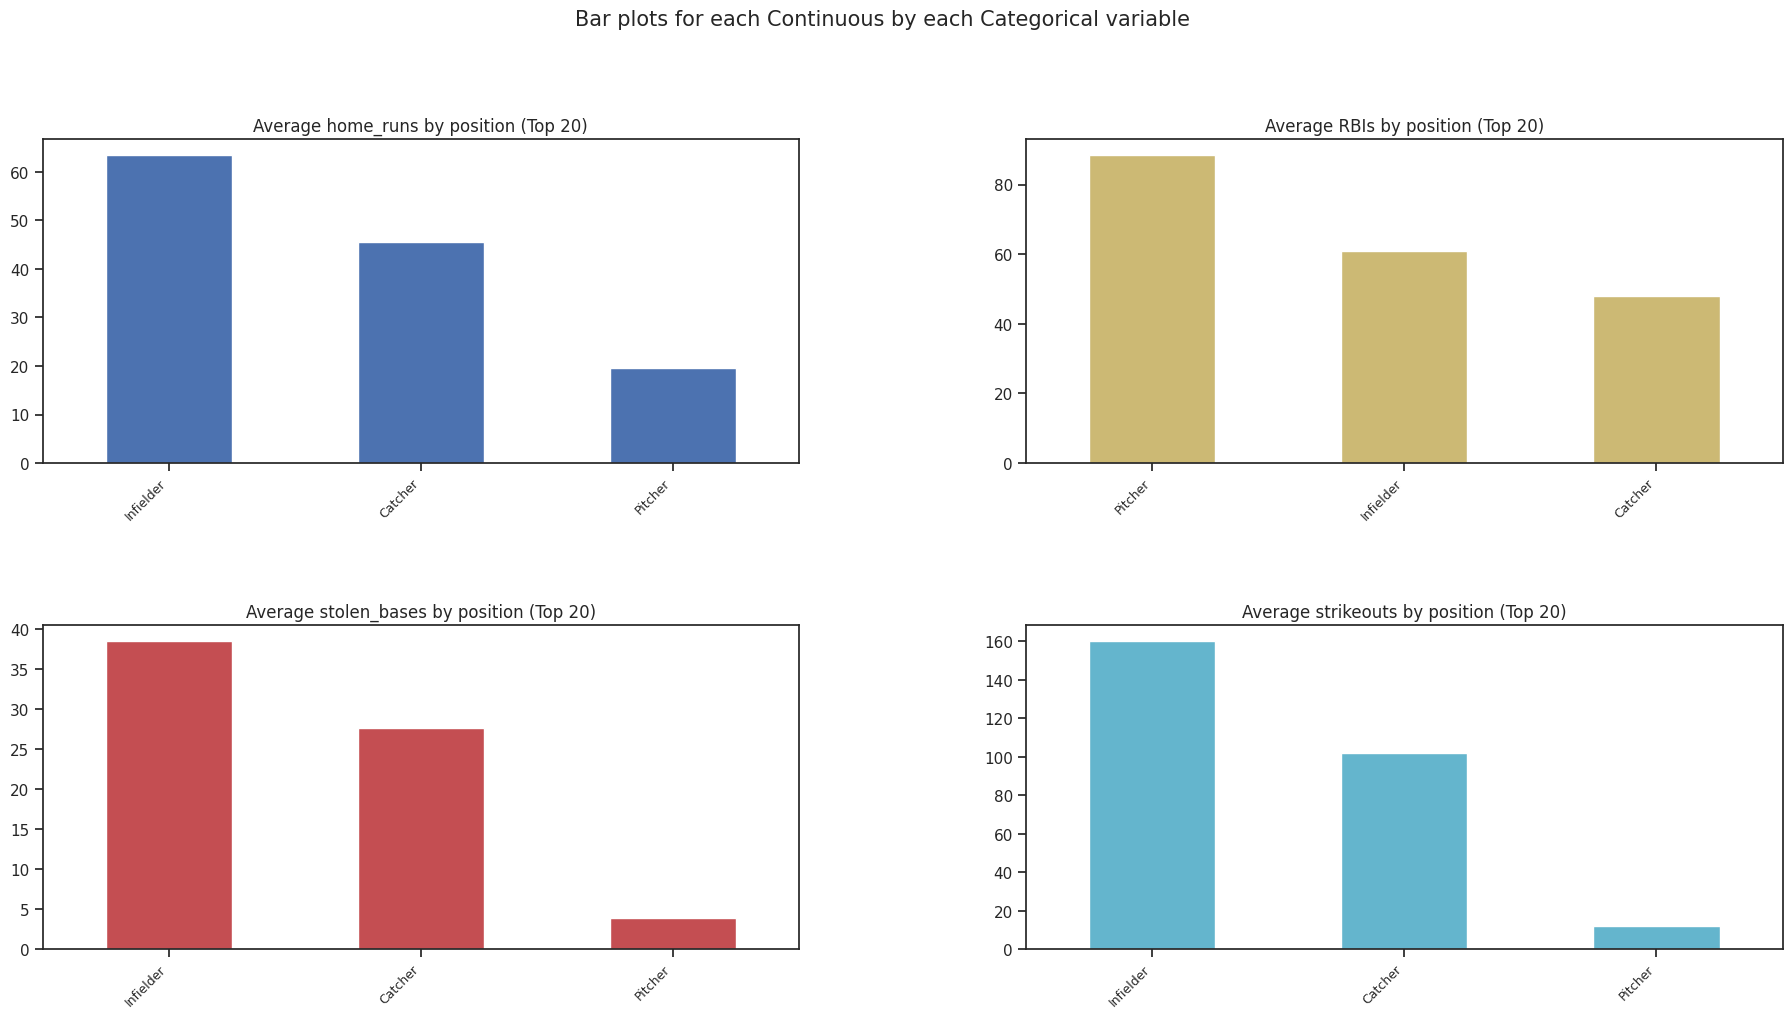

All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Unnamed: 0,home_runs,RBIs,stolen_bases,strikeouts,position
0,0,22.222222,93.75,3.389831,8.333333,Pitcher
1,1,16.666667,62.50,3.389831,8.333333,Pitcher
2,2,11.111111,75.00,2.542373,8.333333,Pitcher
3,3,8.333333,68.75,4.237288,8.333333,Pitcher
4,4,19.444444,100.00,3.389831,8.333333,Pitcher
5,5,30.555556,118.75,5.932203,25.000000,Pitcher
6,6,8.333333,87.50,3.389831,16.666667,Pitcher
7,7,19.444444,87.50,4.237288,8.333333,Pitcher
8,8,2.777778,56.25,3.389831,8.333333,Pitcher
9,9,16.666667,68.75,4.237288,0.000000,Pitcher


In [ ]:
%matplotlib inline
AutoViz_Class().AutoViz(filename=ff)